## Import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import required libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns

import re
import string

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

## Load dataset

In [3]:
# Load data
books_data = pd.read_csv('/content/drive/MyDrive/SC4021/new_pre_processed_data.csv')
books_data.head()

,comment_text,sentiment
0,commenttext,2
1,ded get call cthulhu weird tale vintage classi...,3
2,love lovecraft agree call cthulhu not best wor...,3
3,call cthulhu never best work simply popular we...,2
4,shadow over innsmouth second popular work righ...,2


In [4]:
books_data.sentiment.value_counts()

sentiment
1    13906
2     9258
3     6448
0     4354
Name: count, dtype: int64

In [5]:
mask = (books_data['sentiment'] == 0) | (books_data['sentiment'] == 1)
books_data = books_data[mask]

In [6]:
X = books_data.comment_text
y = books_data.sentiment

In [7]:
# Separating the 80% data for training data and 20% for testing data and maintain equal ratio of classes in the train and test sample
X_train, X_test, y_train, y_test = train_test_split(books_data['comment_text'], books_data['sentiment'], test_size=0.2, stratify=books_data['sentiment'], random_state=42)

## TF-IDF Vectorizer

In [8]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  384461


In [9]:
X_train_vectorized = vectoriser.transform(X_train)
X_test_vectorized  = vectoriser.transform(X_test)

## Models

#### 1. Bernoulli Naive Bayes Classifier

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', BernoulliNB())])
tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-1, 1e-2]
}

In [13]:
from sklearn.metrics import classification_report
clf = GridSearchCV(text_clf, tuned_parameters, cv=10)
clf.fit(X_train, y_train)

print(classification_report(y_test, clf.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.7653    0.2434    0.3693       871
           1     0.8047    0.9766    0.8824      2781

    accuracy                         0.8018      3652
   macro avg     0.7850    0.6100    0.6259      3652
weighted avg     0.7953    0.8018    0.7600      3652



In [18]:
type(X_test)

pandas.core.series.Series

In [20]:
from sklearn import metrics

test_vector = vectoriser.transform(X_test)
result = clf.predict(X_test)
confuse = metrics.confusion_matrix(y_test, result)
confuse

array([[ 212,  659],
       [  65, 2716]])

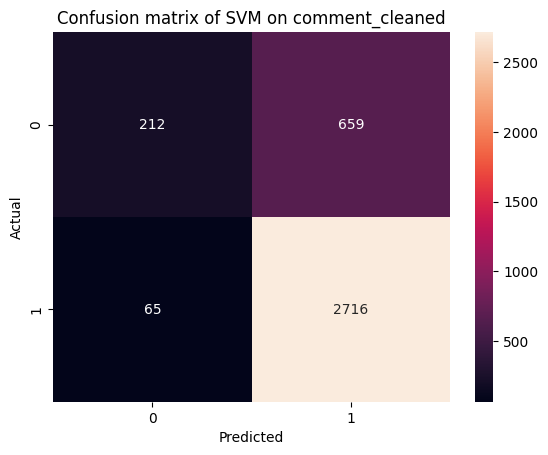

In [21]:
fig = plt.figure()
sns.heatmap(confuse, annot = True, fmt='d')
plt.title("Confusion matrix of SVM on comment_cleaned")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
from sklearn import metrics

F1_score = metrics.f1_score(y_test, result)
average_precision = metrics.average_precision_score(y_test, result)
precision_score= metrics.precision_score(y_test, result)
recall_score = metrics.recall_score(y_test, result)
accuracy = metrics.accuracy_score(y_test, result)

print('F1 score: {0:0.3f}'.format(F1_score))
print('Precision score: {0:0.3f}'.format(precision_score))
print('Recall score: {0:0.3f}'.format(recall_score))
print('Average precision-recall score: {0:0.3f}'.format(average_precision))
print('Accuracy score: {0:0.3f}'.format(accuracy))

F1 score: 0.882
Precision score: 0.805
Recall score: 0.977
Average precision-recall score: 0.804
Accuracy score: 0.802
